In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ejercicio 1: Delineador

In [2]:
# Creamos las categorias
sexo = ['M', 'F', 'Otro']
estatura = ['<150cm', '150-170cm', '170-190cm', '>190cm']
cabello = ['Corto', 'Mediano (hasta orejas)', 'Largo (supera hombros)']
color = ['Rojo', 'Rubio', 'Castaño', 'Negro', 'Otro']
delineador = ['Si', 'No']

In [3]:
# Creacion de datos artificiales
v_sexo = np.random.choice(sexo, 1000)
v_estatura = np.random.choice(estatura, 1000)
v_cabello = np.random.choice(cabello, 1000)
v_color = np.random.choice(color, 1000)
# v_delineador = np.random.choice(delineador, 100)

In [4]:
# Creacion del dataframe
df = pd.DataFrame()

df['Sexo'] = v_sexo 
df['Estatura'] = v_estatura
df['Cabello'] = v_cabello
df['Color'] = v_color
df['Delineador'] = np.where(
    ((df['Sexo'] == 'F') & ((df['Estatura'] == '<150cm') | (df['Estatura'] == '150-170cm'))) | 
    ((df['Sexo'] == 'M') & ((df['Estatura'] == '150-170cm') | (df['Estatura'] == '>190cm'))), 
    'Si', 'No')

df.head()

,Sexo,Estatura,Cabello,Color,Delineador
0,Otro,<150cm,Corto,Negro,No
1,Otro,>190cm,Largo (supera hombros),Rubio,No
2,F,>190cm,Corto,Castaño,No
3,M,150-170cm,Largo (supera hombros),Otro,Si
4,Otro,150-170cm,Largo (supera hombros),Otro,No


Sistema supervisado:
Con las características vamos a predecir si compro o no el delineador

In [5]:
df.Delineador.value_counts()

No    678
Si    322
Name: Delineador, dtype: int64

In [6]:
# Split en train y test 
X = df.drop(columns='Delineador')  # selecciona todas las columnas sin la de 'delineador'
y = df['Delineador']

# Separa los datos en columnas y los transforma en 0 y 1
X_new = pd.get_dummies(X) 

In [7]:
X_new.head()

,Sexo_F,Sexo_M,Sexo_Otro,Estatura_150-170cm,Estatura_170-190cm,Estatura_<150cm,Estatura_>190cm,Cabello_Corto,Cabello_Largo (supera hombros),Cabello_Mediano (hasta orejas),Color_Castaño,Color_Negro,Color_Otro,Color_Rojo,Color_Rubio
0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0


## Selección de algoritmo

In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
# Particionar los datos para test y train
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [11]:
# Entrenar el arbol
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [12]:
y_train.unique()

array(['No', 'Si'], dtype=object)

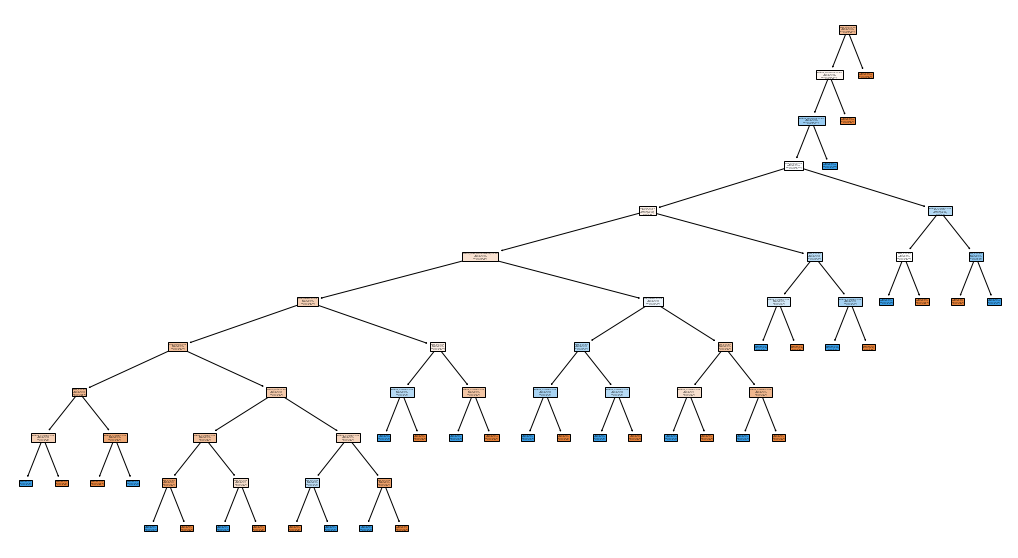

In [13]:
# Graficando
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns, class_names=y_train.unique(), filled=True)

In [14]:
y_pred= clf.predict(X_test)

In [16]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       215
          Si       1.00      1.00      1.00       115

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



Precisión del 100% \
f1_score es la media armonica entre la precision y recall